## Libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MiniBatchKMeans
from numpy import where
from numpy import arange
from scipy.optimize import curve_fit
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

## Import Data into Notebook

In [2]:
# Reading World Bank Data pertaining to Electricity Consumption
filename = "world_bank_data.csv"
def read_csv_file(file_name):
    """
        Read csv file into a pandas dataframe
        Inputs:
            file_name : The csv filename to read
        Returns:
            pandas.DataFrame
    """
    return pd.read_csv(file_name, nrows=9000)

In [3]:
# Applying Transpose function to the df and displaying header records
countries_df = read_csv_file(filename)
tr_df = countries_df.transpose()
tr_df.head()

,0,1,2,3,4,5,6,7,8,9,...,8990,8991,8992,8993,8994,8995,8996,8997,8998,8999
CountryName,Arab World,Arab World,Arab World,Arab World,Arab World,Arab World,Arab World,Arab World,Arab World,Arab World,...,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan
CountryCode,ARB,ARB,ARB,ARB,ARB,ARB,ARB,ARB,ARB,ARB,...,AZE,AZE,AZE,AZE,AZE,AZE,AZE,AZE,AZE,AZE
IndicatorName,"Adolescent fertility rate (births per 1,000 wo...",Age dependency ratio (% of working-age populat...,"Age dependency ratio, old (% of working-age po...","Age dependency ratio, young (% of working-age ...",Aquaculture production (metric tons),Arms exports (SIPRI trend indicator values),Arms imports (SIPRI trend indicator values),"Birth rate, crude (per 1,000 people)",Broad money (% of GDP),Capture fisheries production (metric tons),...,Age dependency ratio (% of working-age populat...,"Age dependency ratio, old (% of working-age po...","Age dependency ratio, young (% of working-age ...","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Fertility rate, total (births per woman)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Mobile cellular subscriptions
IndicatorCode,SP.ADO.TFRT,SP.POP.DPND,SP.POP.DPND.OL,SP.POP.DPND.YG,ER.FSH.AQUA.MT,MS.MIL.XPRT.KD,MS.MIL.MPRT.KD,SP.DYN.CBRT.IN,FM.LBL.BMNY.GD.ZS,ER.FSH.CAPT.MT,...,SP.POP.DPND,SP.POP.DPND.OL,SP.POP.DPND.YG,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.TFRT.IN,SP.DYN.LE00.FE.IN,SP.DYN.LE00.MA.IN,SP.DYN.LE00.IN,IT.CEL.SETS
Year,1960,1960,1960,1960,1960,1960,1960,1960,1960,1960,...,1960,1960,1960,1960,1960,1960,1960,1960,1960,1960


In [4]:
#Create actual dataframe after transpose
countries_data = tr_df.transpose()
countries_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,134.772
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,88.0611
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.59195
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.3242
4,Arab World,ARB,Aquaculture production (metric tons),ER.FSH.AQUA.MT,1960,4600


In [5]:
#Defining the indicators for data selection
indicators = ["CO2 emissions from electricity and heat production, total (% of total fuel combustion)",
"Electric power transmission and distribution losses (% of output)",
"Electricity production from renewable sources, excluding hydroelectric (kWh)",
"Electric power consumption (kWh per capita)",
"Electricity production from coal sources (% of total)",
"Electricity production from hydroelectric sources (% of total)",
"Electricity production from natural gas sources (% of total)",
"Electricity production from nuclear sources (% of total)",
"Electricity production from oil sources (% of total)",
"Electricity production from oil, gas and coal sources (% of total)",
"Electricity production from renewable sources, excluding hydroelectric (% of total)",
"Renewable electricity output (% of total electricity output)"]

In [6]:
#getting Electricity Data based on INdicators
electricity_data = countries_data[countries_data["IndicatorName"].isin(indicators)]
elec_data = electricity_data
electricity_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
282,Central Europe and the Baltics,CEB,CO2 emissions from electricity and heat produc...,EN.CO2.ETOT.ZS,1960,42.2718
295,Central Europe and the Baltics,CEB,Electric power transmission and distribution l...,EG.ELC.LOSS.ZS,1960,9.56219
296,Central Europe and the Baltics,CEB,"Electricity production from renewable sources,...",EG.ELC.RNWX.KH,1960,1e+07
413,Early-demographic dividend,EAR,CO2 emissions from electricity and heat produc...,EN.CO2.ETOT.ZS,1960,19.7376
427,Early-demographic dividend,EAR,Electric power transmission and distribution l...,EG.ELC.LOSS.ZS,1960,9.91119


In [7]:
#Converting Strings to Number Variables
def convert_str_cat(df, col_name):
    """
        Converts string variables to category variables
        Inputs:
            df - The input dataframe
            col_name - The column to be converted to category variable.
        Returns:
            Series
    """
    return df[col_name].astype("category").cat.codes
    
electricity_data["CountryCode"] = convert_str_cat(electricity_data, "CountryCode")
electricity_data["IndicatorCode"] = convert_str_cat(electricity_data, "IndicatorCode")
#electricity_data.drop(columns = ["CountryName", "IndicatorName"], inplace=True)
electricity_data.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
8841,Austria,1,Electricity production from nuclear sources (%...,5,1960,0
8842,Austria,1,Electricity production from oil sources (% of ...,6,1960,4.28053
8843,Austria,1,"Electricity production from oil, gas and coal ...",1,1960,26.4409
8844,Austria,1,"Electricity production from renewable sources,...",8,1960,0
8845,Austria,1,"Electricity production from renewable sources,...",7,1960,0


In [8]:
#Creation of a function to Normalize the data for Value Column
def normalize_data(df):
    normalized_df=(df["Value"]-df["Value"].mean())/df["Value"].std()
    return normalized_df

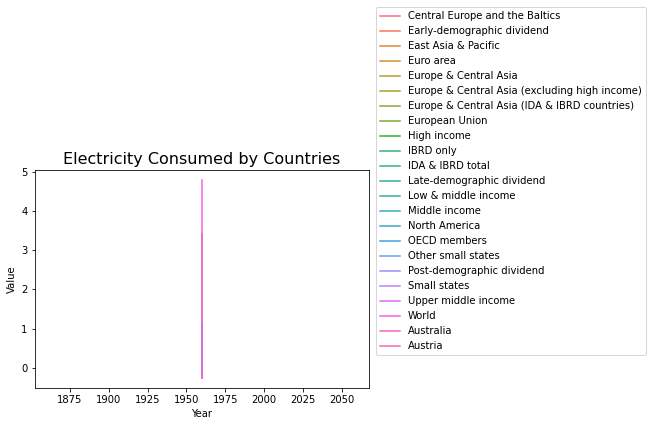

In [9]:
#Lineplot to display Normalized Electricity Consumption values for all the years for all selected countries
electricity_data = electricity_data.replace("..", 0)
electricity_data["Value"] = normalize_data(electricity_data)
sns.lineplot(x='Year',y='Value', hue='CountryName', err_style='bars', data=electricity_data)
#added overall title
plt.title('Electricity Consumed by Countries', fontsize=16)
#place legend in center right of plot
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='lower left', borderaxespad=0)

In [10]:
elec_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
282,Central Europe and the Baltics,2,CO2 emissions from electricity and heat produc...,10,1960,42.2718
295,Central Europe and the Baltics,2,Electric power transmission and distribution l...,3,1960,9.56219
296,Central Europe and the Baltics,2,"Electricity production from renewable sources,...",7,1960,1e+07
413,Early-demographic dividend,3,CO2 emissions from electricity and heat produc...,10,1960,19.7376
427,Early-demographic dividend,3,Electric power transmission and distribution l...,3,1960,9.91119


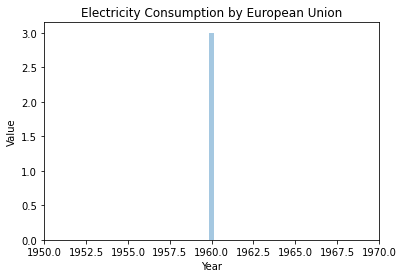

In [11]:
#Filtering the Data for European Union and plotting the Electricity Consumption
elec_data = elec_data[elec_data["CountryName"]=="European Union"]
#sns.lineplot(x='Year',y='Value', data=elec_data)

x = elec_data["Year"]
y = elec_data["Value"]

# plot distplot
fig, ax = plt.subplots()
sns.distplot(x, ax = ax)
 
# This will change the limits of the x-axis
ax.set_xlim(1950, 1970)
 
# This will add label to the X-axis
ax.set_xlabel( "Year")
 
# This will add label to the Y-axis
ax.set_ylabel( "Value")
 
# This will add title to the plot
ax.set_title( "Electricity Consumption by European Union") 
plt.show()

# Creating Clusters

In [12]:
#Creation of new dataframe with Electricity Consumption and Electricity Production from Nuclear Sources together in same column
data_df = electricity_data[electricity_data["IndicatorName"].isin(['Electric power consumption (kWh per capita)', 'Electricity production from nuclear sources (% of total)'])]
data_df = data_df.replace("..", None)
data_df["Value"] = data_df["Value"].fillna(data_df["Value"].mean())
data_df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1117,Euro area,7,Electric power consumption (kWh per capita),9,1960,-0.250203
1122,Euro area,7,Electricity production from nuclear sources (%...,5,1960,-0.250205
1734,European Union,8,Electric power consumption (kWh per capita),9,1960,-0.250203
1739,European Union,8,Electricity production from nuclear sources (%...,5,1960,-0.250205
2182,High income,9,Electric power consumption (kWh per capita),9,1960,-0.250201


In [13]:
#merging the data for 2 Indicators
merged_df = data_df[data_df["IndicatorName"] == "Electric power consumption (kWh per capita)"][["CountryName", "Year", "Value"]].merge(data_df[data_df["IndicatorName"] == "Electricity production from nuclear sources (% of total)"][["CountryName", "Year", "Value"]], on=["CountryName", "Year"])
merged_df.head()

,CountryName,Year,Value_x,Value_y
0,Euro area,1960,-0.250203,-0.250205
1,European Union,1960,-0.250203,-0.250205
2,High income,1960,-0.250201,-0.250205
3,North America,1960,-0.250198,-0.250205
4,OECD members,1960,-0.250201,-0.250205


In [14]:
# define the true objective function with curve_fit
def objective(x, a, b):
    return a * x + b
# curve fit
popt, _ = curve_fit(objective, merged_df["Value_x"], merged_df["Value_y"])
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

y = -0.00035 * x + -0.25029


In [15]:
filtered_df = merged_df[merged_df["CountryName"].isin(["European Union", "High income"])]
filtered_df["CountryName"] = filtered_df["CountryName"].astype("category").cat.codes
merged_df.head()

,CountryName,Year,Value_x,Value_y
0,Euro area,1960,-0.250203,-0.250205
1,European Union,1960,-0.250203,-0.250205
2,High income,1960,-0.250201,-0.250205
3,North America,1960,-0.250198,-0.250205
4,OECD members,1960,-0.250201,-0.250205


In [16]:
#Calculation of lower and upper Confidence Intervals on Population Value
lower , upper = st.t.interval(0.95, len(merged_df["Value_x"])-1, loc=np.mean(merged_df["Value_x"]), scale=st.sem(merged_df["Value_x"]))
def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, parameters and
    sigmas for single value or array x. Functions values are calculated for 
    all combinations of +/- sigma and the minimum and maximum is determined.
    Can be used for all number of parameters and sigmas >=1.
    
    This routine can be used in assignment programs.
    """

    import itertools as iter
    import numpy as np
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper 

In [17]:
#Printing of lower and Upper Confidence Intervals ranges
#err_ranges(dx_df, func, param, sigma)
print(lower)
print(upper)

-0.250202620272581
-0.25020003378113553


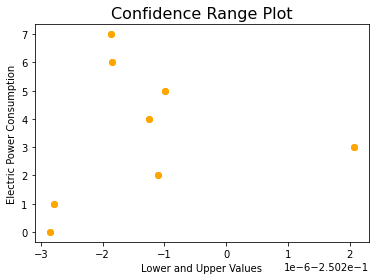

In [18]:
#Plotting the COnfidence Range with lower and Upper Values and Applyig the fitting with objective function
for lower,upper,y in zip(merged_df["Value_x"],merged_df["Value_x"],range(len(merged_df["Value_x"]))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
    x_line = arange(lower, upper, 10)
    # calculate the output for the range
    y_line = objective(x_line, a, b)
    # create a line plot for the mapping function
    plt.plot(x_line, y_line, '--', color='red')
#adding overall title
plt.title('Confidence Range Plot', fontsize=16)

#adding axis titles
plt.xlabel('Lower and Upper Values')
plt.ylabel('Electric Power Consumption')
plt.show()

In [19]:
#Creation of function to plot the Clusters and using fitting
def plot_graph(merged_df, colored=False):
#    x_line = arange(lower, upper, 100)
    x_line = arange(min(merged_df["Value_x"]), max(merged_df["Value_x"]), 100)
    # calculate the output for the range
    y_line = objective(x_line, a, b)
    # create a line plot for the mapping function
    #plt.plot(x_line, y_line, '--', color='red')
    if not colored:
        plt.scatter(merged_df["Value_x"], merged_df["Value_y"])
    else:
        plt.scatter(merged_df["Value_x"], merged_df["Value_y"], c=identified_clusters, cmap="rainbow")

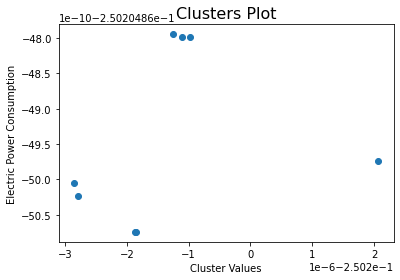

In [20]:
#Plotting the Clusters
plot_graph(merged_df)
#adding overall title
plt.title('Clusters Plot', fontsize=16)

#adding axis titles
plt.xlabel('Cluster Values')
plt.ylabel('Electric Power Consumption')
plt.show()

In [21]:
def get_clusters(df):
    """
        Create clusters from the given data
        Inputs :
            df - The dataframe to create clusters from
        Outputs :
            Series
    """
    model = MiniBatchKMeans(n_clusters=2)
    model.fit(df)
    predictions = model.predict(df)
    return predictions

predictions = get_clusters(filtered_df)
clusters = list(set(predictions))
print("The clusters are : ")
clusters

The clusters are : 


[0, 1]

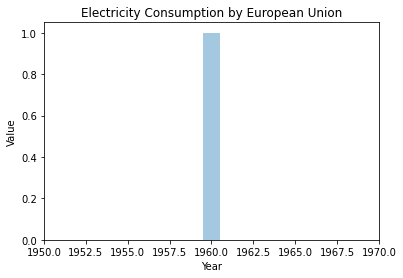

In [22]:
def plot_clusters(clusters, predictions, electricity_data):
    """
        Plot the clusters generated by the model
        Inputs :
            clusters - The list of clusters identified by the model
            predictions - The prediction of cluster made by the model
            electricity_data - The input dataframe
        Outputs :
            None
    """
    for cluster in clusters:
        indices = where(predictions == cluster)
        cluster_data = filtered_df.iloc[indices]
        #plt.scatter(cluster_data["Year"], cluster_data["Value_x"])
        x = cluster_data["Year"]
        y = cluster_data["Value_x"]

    # plot distplot
    fig, ax = plt.subplots()
    sns.distplot(x, ax = ax)

    # This will change the limits of the x-axis
    ax.set_xlim(1950, 1970)

    # This will add label to the X-axis
    ax.set_xlabel( "Year")

    # This will add label to the Y-axis
    ax.set_ylabel( "Value")

    # This will add title to the plot
    ax.set_title( "Electricity Consumption by European Union") 
    plt.show()
    #plt.legend(["0", "1"])
    #plt.show()
    
plot_clusters(clusters, predictions, electricity_data)

In [23]:
filtered_df.head()

,CountryName,Year,Value_x,Value_y
1,0,1960,-0.250203,-0.250205
2,1,1960,-0.250201,-0.250205


In [24]:
#Converting Country Codes from 0 and 1 to Euro Area and European Union & creating two dataframes
filtered_df.loc[filtered_df["CountryName"] == 0, "CountryName"] = "Euro Area"
filtered_df.loc[filtered_df["CountryName"] == 1, "CountryName"] = "European Union"
df = filtered_df.groupby(['CountryName', 'Year']).sum(['Value'])
df_euro = df
df_eu = df

In [25]:
df.head()

,,Value_x,Value_y
CountryName,Year,,
Euro Area,1960,-0.250203,-0.250205
European Union,1960,-0.250201,-0.250205


In [26]:
#dropping Emissions value from population dataframe and setting the index
df = df.drop('Value_y', axis=1)
df.set_index(["Value_x"], inplace = True, append = True, drop = True)
df.reset_index(inplace=True)
df.head()

,CountryName,Year,Value_x
0,Euro Area,1960,-0.250203
1,European Union,1960,-0.250201


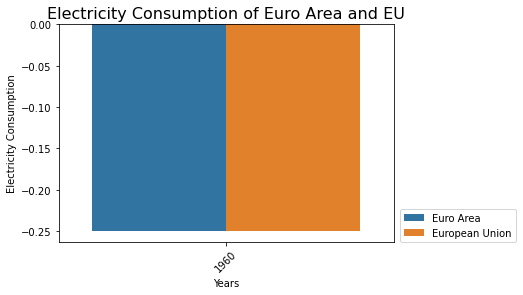

In [27]:
# Plotting the Electricity Consumption Comparision between Euro Area , EU and HIgh income yearwise
# plot with seaborn barplot
sns.barplot(data=df, x='Year', y='Value_x', hue='CountryName')
#add overall title
plt.title('Electricity Consumption of Euro Area and EU', fontsize=16)

#add axis titles
plt.xlabel('Years')
plt.ylabel('Electricity Consumption')

#place legend in center right of plot
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)

#rotate x-axis labels
plt.xticks(rotation=45)
plt.show()

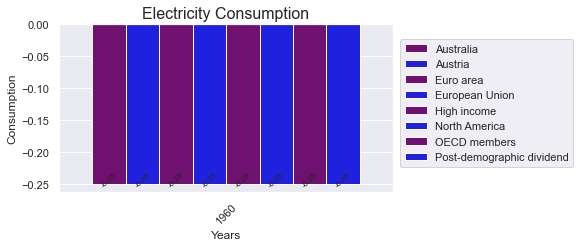

In [28]:
# Plotting the Electricity Consumption yearwise

#df = df.groupby(['CountryCode', 'Year']).agg(Consumption=("Value", 'sum'))
df = merged_df.groupby(['CountryName', 'Year']).agg(Consumption=('Value_x','sum'))
df = df.reset_index()

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

fig, plots = plt.subplots()
# plot barplot
plots = sns.barplot(x="Year",
           y="Consumption",
           hue="CountryName", 
           data=df, ci = "sd", capsize = 0.1, palette=['purple', 'blue'])

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 5), rotation=45,
                   textcoords='offset points')
    
plots.set_box_aspect(200/(len(plots.patches)*50)) #change 10 to modify the y/x axis ratio

#added overall title
plt.title('Electricity Consumption', fontsize=16)

#added axis titles
plt.xlabel('Years')
plt.ylabel('Consumption')

#placed legend in Corner of plot
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='lower left', borderaxespad=0)

#rotate x-axis labels
plt.xticks(rotation=45)
plt.show()